**Parte 1**

In [ ]:
import pandas as pd

# Caminhos dos arquivos CSV no Google Drive
caminho_csv1 = "/content/drive/MyDrive/Colab Notebooks/CasePositivo.csv"

# Tentar carregar o arquivo CSV com diferentes configurações
try:
    dados_debentures = pd.read_csv(caminho_csv1, delimiter=',')  # Tentar com delimitador padrão (vírgula)
except Exception as e:
    print("Erro com delimitador padrão:", e)
    try:
        dados_debentures = pd.read_csv(caminho_csv1, delimiter=';', error_bad_lines=False)  # Tentar com ponto e vírgula e ignorar linhas ruins
    except Exception as e2:
        print("Erro com delimitador de ponto e vírgula:", e2)
        try:
            dados_debentures = pd.read_csv(caminho_csv1, delimiter='\t', quotechar='"', escapechar='\\')  # Tentar com tabulação e ajustes para cotações e caracteres especiais
        except Exception as e3:
            print("Erro com delimitador de tabulação:", e3)
            print("Não foi possível ler o arquivo CSV.")

# Exibir as primeiras linhas para verificar, se bem-sucedido
if 'dados_debentures' in locals():
    print(dados_debentures.head())


Erro com delimitador padrão: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2

                                       Nome do Ativo        Data     PU Curva  \
0  POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...  10/03/2021         1000   
1  POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...  11/03/2021  1000,251287   
2  POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...  12/03/2021  1000,502642   
3  POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...  15/03/2021  1000,754055   
4  POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...  16/03/2021  1001,005524   

  PU Indicativo Taxa Compra Taxa Indicativa  Quantidade em Mercado  
0           NaN         NaN             NaN                    NaN  
1           NaN         NaN             NaN               300000.0  
2           NaN         NaN             NaN               300000.0  
3           NaN         NaN             NaN               300000.0  
4           NaN         NaN             NaN               300000.0  


<ipython-input-12-bc18298f14f3>:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dados_debentures = pd.read_csv(caminho_csv1, delimiter=';', error_bad_lines=False)  # Tentar com ponto e vírgula e ignorar linhas ruins


In [ ]:
# Substituindo todos os valores NaN por 'Não Disponível' em todas as colunas
dados_formatados = dados_debentures.fillna('-')

# Selecionando apenas as 10 primeiras linhas
dados_formatados = dados_formatados.head(10)

# Convertendo colunas numéricas para float e formatando para duas casas decimais
colunas_numericas = ['PU Curva', 'Quantidade em Mercado']
for coluna in colunas_numericas:
    # Ignorando as células com 'Não Disponível' ao converter para float
    dados_formatados[coluna] = pd.to_numeric(dados_formatados[coluna], errors='coerce')
    dados_formatados[coluna] = dados_formatados[coluna].map(lambda x: f'{x:,.2f}' if not pd.isna(x) else '-')

dados_formatados



,Nome do Ativo,Data,PU Curva,PU Indicativo,Taxa Indicativa,Quantidade em Mercado,valor_mercado_total_diario
0,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,10/03/2021,1000.000000,NaN,NaN,NaN,NaN
1,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,11/03/2021,1000.251287,NaN,NaN,300000.0,300075386.1
2,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,12/03/2021,1000.502642,NaN,NaN,300000.0,300150792.6
3,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,15/03/2021,1000.754055,NaN,NaN,300000.0,300226216.5
4,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,16/03/2021,1001.005524,NaN,NaN,300000.0,300301657.2


In [ ]:
# Eliminando a coluna 'Taxa de Compra' e substituindo NaN por '-'
dados_debentures_modificados = dados_debentures.drop(columns=['Taxa Compra']).fillna('-')

# Verificando o resultado após a remoção da coluna e substituição de NaN
dados_debentures_modificados.head()


,Nome do Ativo,Data,PU Curva,PU Indicativo,Taxa Indicativa,Quantidade em Mercado,valor_mercado_total_diario
0,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,10/03/2021,1000.000000,-,-,-,-
1,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,11/03/2021,1000.251287,-,-,300000.0,300075386.1
2,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,12/03/2021,1000.502642,-,-,300000.0,300150792.6
3,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,15/03/2021,1000.754055,-,-,300000.0,300226216.5
4,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,16/03/2021,1001.005524,-,-,300000.0,300301657.2


In [ ]:
# Como há ativos POSI13 e POSI12, vamos realizar a concatenação baseada na data
# Filtrando novamente os dados para os ativos POSI12 e POSI13
dados_posi12 = dados_debentures_modificados[dados_debentures_modificados['Nome do Ativo'].str.contains('POSI12')]
dados_posi13 = dados_debentures_modificados[dados_debentures_modificados['Nome do Ativo'].str.contains('POSI13')]

# Realizando a concatenação dos dados de POSI12 e POSI13 baseada na data
dados_concatenados = pd.concat([dados_posi12, dados_posi13]).sort_values(by='Data')
# Exibindo o resultado
dados_concatenados.head(10)


,Nome do Ativo,Data,PU Curva,PU Indicativo,Taxa Indicativa,Quantidade em Mercado,valor_mercado_total_diario
227,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/02/2022,832.737011,"840,647263","0,038072",300000.0,249821103.3
704,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/02/2023,1083.744431,"1096,937298","0,027339",350000.0,379310550.85
722,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/03/2023,865.025080,"876,832983","0,028052",350000.0,302758778.0
16,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/04/2021,1004.320366,-,-,300000.0,301296109.8
493,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/04/2022,1018.637860,-,-,350000.0,356523251.0
268,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/04/2022,696.976685,"769,448671","0,03607",300000.0,209093005.5
57,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/06/2021,938.950732,-,-,300000.0,281685219.6
309,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/06/2022,689.735158,"699,676769","0,034026",300000.0,206920547.4
534,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/06/2022,1043.997652,"1049,1182","0,034664",350000.0,365399178.2
785,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/06/2023,901.401082,"905,307642","0,033875",350000.0,315490378.7


In [ ]:
# Definindo o valor futuro e o número de períodos (anos)
valor_futuro = 100000000  # R$ 100 milhões
periodos = 3  # 3 anos

# Função para calcular o valor presente
def calcular_valor_presente(fv, taxa, n):
    try:
        # Convertendo a taxa para formato numérico e calculando o valor presente
        taxa = float(taxa.replace(',', '.')) / 100  # Convertendo para formato numérico
        valor_presente = fv / ((1 + taxa) ** n)
        return valor_presente
    except:
        # Se a taxa não for numérica, retornar "-"
        return "-"

# Aplicando a função para cada linha
dados_concatenados['Valor Presente'] = dados_concatenados.apply(lambda row: calcular_valor_presente(valor_futuro, row['Taxa Indicativa'], periodos), axis=1)

# Exibindo o resultado com a nova coluna
dados_concatenados.head()


,Nome do Ativo,Data,PU Curva,PU Indicativo,Taxa Indicativa,Quantidade em Mercado,valor_mercado_total_diario,Valor Presente
227,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/02/2022,832.737011,"840,647263","0,038072",300000.0,249821103.3,99885870.913478
704,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/02/2023,1083.744431,"1096,937298","0,027339",350000.0,379310550.85,99918027.82483
722,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/03/2023,865.025080,"876,832983","0,028052",350000.0,302758778.0,99915891.192817
16,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,01/04/2021,1004.320366,-,-,300000.0,301296109.8,-
493,POSI13 - POSITIVO TECNOLOGIA - 20260207 - DI +...,01/04/2022,1018.637860,-,-,350000.0,356523251.0,-


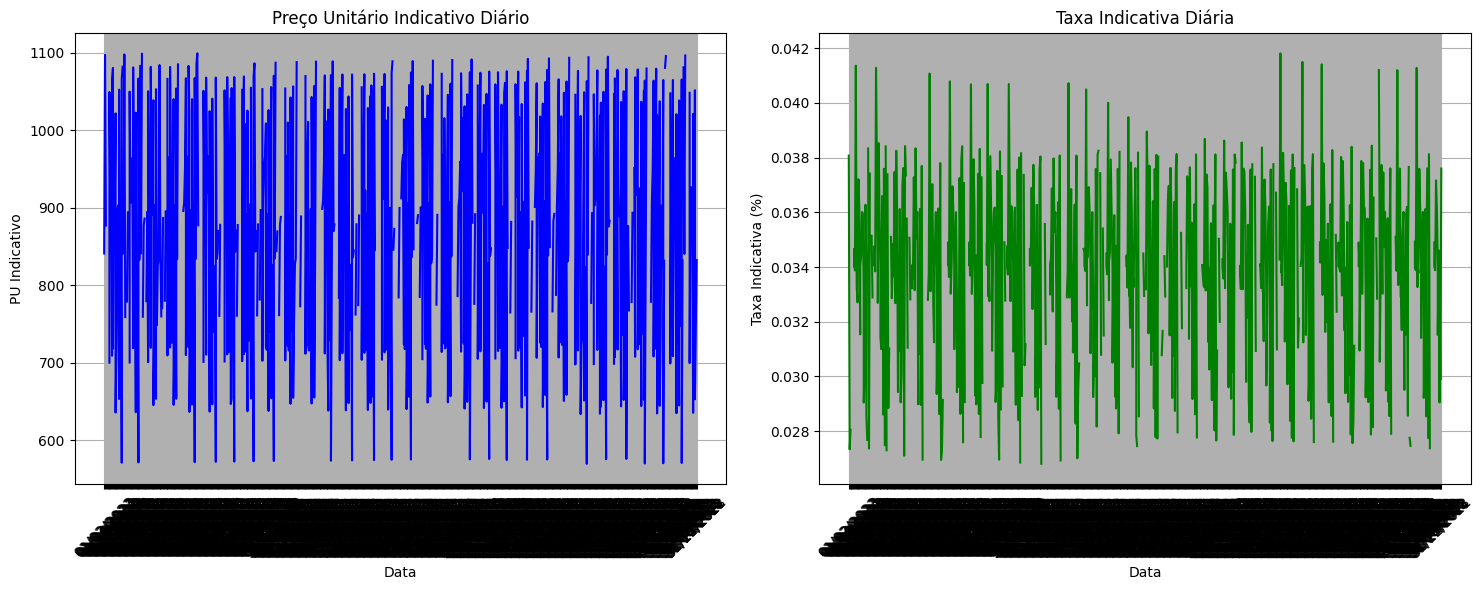

In [ ]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'PU Indicativo' para numérico e tratando valores não numéricos
dados_concatenados['PU Indicativo Num'] = pd.to_numeric(dados_concatenados['PU Indicativo'].str.replace(',', '.'), errors='coerce')

# Convertendo a coluna 'Taxa Indicativa' para numérico e tratando valores não numéricos
dados_concatenados['Taxa Indicativa Num'] = pd.to_numeric(dados_concatenados['Taxa Indicativa'].str.replace(',', '.'), errors='coerce')

# Criando um gráfico
plt.figure(figsize=(15, 6))

# Gráfico do Preço Unitário Indicativo
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.plot(dados_concatenados['Data'], dados_concatenados['PU Indicativo Num'], label='PU Indicativo', color='blue')
plt.xlabel('Data')
plt.ylabel('PU Indicativo')
plt.title('Preço Unitário Indicativo Diário')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico da Taxa Indicativa
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
plt.plot(dados_concatenados['Data'], dados_concatenados['Taxa Indicativa Num'], label='Taxa Indicativa', color='green')
plt.xlabel('Data')
plt.ylabel('Taxa Indicativa (%)')
plt.title('Taxa Indicativa Diária')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustando o layout
plt.tight_layout()
plt.show()


<ipython-input-51-587f9ac61473>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dados_concatenados['Data'], rotation=45)


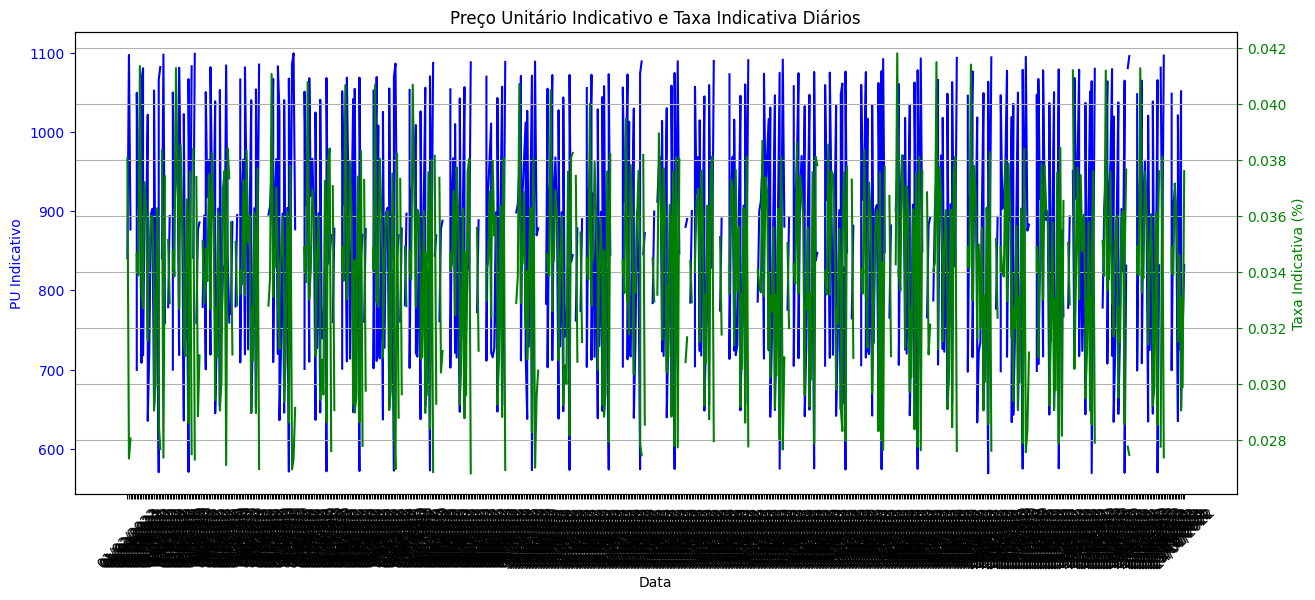

In [ ]:
# Criando um gráfico combinado para Preço Unitário Indicativo e Taxa Indicativa
plt.figure(figsize=(15, 6))

# Preparando o eixo para o Preço Unitário Indicativo
ax1 = plt.gca()  # Obtendo o eixo atual
ax1.plot(dados_concatenados['Data'], dados_concatenados['PU Indicativo Num'], label='PU Indicativo', color='blue')
ax1.set_xlabel('Data')
ax1.set_ylabel('PU Indicativo', color='blue')
ax1.tick_params('y', colors='blue')

# Preparando um segundo eixo para a Taxa Indicativa
ax2 = ax1.twinx()  # Criando um segundo eixo que compartilha o mesmo eixo x
ax2.plot(dados_concatenados['Data'], dados_concatenados['Taxa Indicativa Num'], label='Taxa Indicativa', color='green')
ax2.set_ylabel('Taxa Indicativa (%)', color='green')
ax2.tick_params('y', colors='green')

# Títulos e layout
plt.title('Preço Unitário Indicativo e Taxa Indicativa Diários')
ax1.set_xticklabels(dados_concatenados['Data'], rotation=45)
plt.grid(True)

# Mostrando o gráfico
plt.show()


In [ ]:
# Caminho do arquivo CSV para a análise de regressão logística
caminho_csv_ntnbifix = "/content/drive/MyDrive/Colab Notebooks/CasePositivo.csv"

# Tentando carregar o arquivo CSV com diferentes configurações, similar ao exemplo fornecido
try:
    dados_ntnbifix = pd.read_csv(caminho_csv_ntnbifix, delimiter=',')  # Tentar com delimitador padrão (vírgula)
except Exception as e:
    print("Erro com delimitador padrão:", e)
    try:
        dados_ntnbifix = pd.read_csv(caminho_csv_ntnbifix, delimiter=';', error_bad_lines=False)  # Tentar com ponto e vírgula e ignorar linhas ruins
    except Exception as e2:
        print("Erro com delimitador de ponto e vírgula:", e2)
        try:
            dados_ntnbifix = pd.read_csv(caminho_csv_ntnbifix, delimiter='\t', quotechar='"', escapechar='\\')  # Tentar com tabulação e ajustes para cotações e caracteres especiais
        except Exception as e3:
            print("Erro com delimitador de tabulação:", e3)
            dados_ntnbifix = None
            print("Não foi possível ler o arquivo CSV.")

# Exibir as primeiras linhas para verificar, se bem-sucedido
if dados_ntnbifix is not None:
    display = dados_ntnbifix.head()
else:
    display = "Falha na leitura do arquivo."

display


Erro com delimitador padrão: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2



<ipython-input-53-b6eeefa14000>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dados_ntnbifix = pd.read_csv(caminho_csv_ntnbifix, delimiter=';', error_bad_lines=False)  # Tentar com ponto e vírgula e ignorar linhas ruins


,Nome do Ativo,Data,PU Curva,PU Indicativo,Taxa Compra,Taxa Indicativa,Quantidade em Mercado
0,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,10/03/2021,1000,NaN,NaN,NaN,NaN
1,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,11/03/2021,"1000,251287",NaN,NaN,NaN,300000.0
2,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,12/03/2021,"1000,502642",NaN,NaN,NaN,300000.0
3,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,15/03/2021,"1000,754055",NaN,NaN,NaN,300000.0
4,POSI12 - POSITIVO TECNOLOGIA - 20250225 - DI +...,16/03/2021,"1001,005524",NaN,NaN,NaN,300000.0


**Parte 2**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carregando os dados
file_path = '/content/drive/MyDrive/Colab Notebooks/NTNBIFIX.csv'
data = pd.read_csv(file_path, sep=';')

# Convertendo 'Dividend Yield' e 'Taxa Indicativa' para numérico (substituindo vírgulas por pontos)
data['Dividend Yield'] = data['Dividend Yield'].str.replace(',', '.').astype(float)
data['Taxa Indicativa'] = data['Taxa Indicativa'].str.replace(',', '.').astype(float)

# Preenchendo valores ausentes com a média das respectivas colunas
data['Dividend Yield'].fillna(data['Dividend Yield'].mean(), inplace=True)
data['Taxa Indicativa'].fillna(data['Taxa Indicativa'].mean(), inplace=True)

# Preparando os dados para a regressão
X = data[['Taxa Indicativa']]  # Variável independente
y = data['Dividend Yield']  # Variável dependente

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calculando o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.00023342411164318158
Coeficiente de Determinação (R²): -0.0006975502297217329


A análise sugere que a variação da taxa da NTNB 2035 tem uma relação muito limitada ou inexistente com o Dividend Yield do IFIX, conforme indicado pelo baixo valor do Erro Quadrático Médio (MSE) e, mais criticamente, pelo Coeficiente de Determinação (R²) negativo. Isso implica que a taxa da NTNB 2035, como variável única, não é um bom preditor para explicar as variações do Dividend Yield do IFIX.

**Parte 3**

In [ ]:
def marque_atacadas(tab):
    """
    Marca as posições atacadas por rainhas em um tabuleiro de xadrez 8x8.

    :param tab: Matriz 8x8 representando o tabuleiro de xadrez, onde 'R' representa uma rainha.
    :return: Matriz 8x8 com as posições atacadas marcadas com 'X'.
    """
    n = 8  # Tamanho do tabuleiro de xadrez
    # Marcando as posições atacadas
    for i in range(n):
        for j in range(n):
            if tab[i][j] == 'R':
                # Marcar horizontal e vertical
                for k in range(n):
                    if tab[i][k] != 'R':
                        tab[i][k] = 'X'
                    if tab[k][j] != 'R':
                        tab[k][j] = 'X'

                # Marcar diagonais
                # Diagonal superior esquerda
                k, l = i, j
                while k >= 0 and l >= 0:
                    if tab[k][l] != 'R':
                        tab[k][l] = 'X'
                    k -= 1
                    l -= 1

                # Diagonal superior direita
                k, l = i, j
                while k >= 0 and l < n:
                    if tab[k][l] != 'R':
                        tab[k][l] = 'X'
                    k -= 1
                    l += 1

                # Diagonal inferior esquerda
                k, l = i, j
                while k < n and l >= 0:
                    if tab[k][l] != 'R':
                        tab[k][l] = 'X'
                    k += 1
                    l -= 1

                # Diagonal inferior direita
                k, l = i, j
                while k < n and l < n:
                    if tab[k][l] != 'R':
                        tab[k][l] = 'X'
                    k += 1
                    l += 1

    return tab

# Testando a função com o tabuleiro de exemplo
tabuleiro = [
    ['X', ' ', ' ', 'X', ' ', ' ', 'X', ' '],
    [' ', 'X', ' ', 'X', ' ', 'X', ' ', ' '],
    [' ', ' ', 'X', 'X', 'X', ' ', ' ', ' '],
    ['X', 'X', 'X', 'R', 'X', 'X', 'X', 'X'],
    [' ', ' ', 'X', 'X', 'X', ' ', ' ', ' '],
    [' ', 'X', ' ', 'X', ' ', 'X', ' ', ' '],
    ['X', ' ', ' ', 'X', ' ', ' ', 'X', ' '],
    [' ', ' ', ' ', 'X', ' ', ' ', ' ', 'X']
]

tabuleiro_marcado = marque_atacadas(tabuleiro)

# Exibindo o tabuleiro marcado
for linha in tabuleiro_marcado:
    print(' | '.join(linha))



X |   |   | X |   |   | X |  
  | X |   | X |   | X |   |  
  |   | X | X | X |   |   |  
X | X | X | R | X | X | X | X
  |   | X | X | X |   |   |  
  | X |   | X |   | X |   |  
X |   |   | X |   |   | X |  
  |   |   | X |   |   |   | X


In [ ]:
def criar_tabuleiro_vazio():
    """ Cria um tabuleiro de xadrez 8x8 vazio. """
    return [[' ' for _ in range(8)] for _ in range(8)]

def imprimir_tabuleiro(tab):
    """ Imprime o tabuleiro com moldura. """
    print("+---" * 8 + "+")
    for linha in tab:
        print("| " + " | ".join(linha) + " |")
        print("+---" * 8 + "+")

def programa_principal():
    # Exemplo: número de rainhas e suas posições
    n = 4  # Número de rainhas
    posicoes_rainhas = [(3, 3), (1, 4), (5, 2), (6, 0)]  # Posições das rainhas

    # Criar tabuleiro vazio e adicionar as rainhas
    tabuleiro = criar_tabuleiro_vazio()
    for i, j in posicoes_rainhas:
        tabuleiro[i][j] = 'R'

    # Imprimir o tabuleiro inicial só com as rainhas
    print("Tabuleiro Inicial com Rainhas:")
    imprimir_tabuleiro(tabuleiro)

    # Marcar as posições atacadas e imprimir o tabuleiro final
    tabuleiro_atacado = marque_atacadas(tabuleiro)
    print("\nTabuleiro com Posições Atacadas:")
    imprimir_tabuleiro(tabuleiro_atacado)

programa_principal()



Tabuleiro Inicial com Rainhas:
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | R |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | R |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   | R |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| R |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+

Tabuleiro com Posições Atacadas:
+---+---+---+---+---+---+---+---+
| X |   | X | X | X | X | X | X |
+---+---+---+---+---+---+---+---+
| X | X | X | X | R | X | X | X |
+---+---+---+---+---+---+---+---+
| X |   | X | X | X | X |   |   |
+---+---+---+---+---+---+---+---+
| X | X | X | R | X | X | X | X |
+---+---+---+---+---+---+---+---+
| X | X | X | X | X |   |   | X |
+---+---+---+---+

In [ ]:
def criar_tabuleiro_vazio():
    """ Cria um tabuleiro de xadrez 8x8 vazio. """
    return [[' ' for _ in range(8)] for _ in range(8)]

def imprimir_tabuleiro(tab):
    """ Imprime o tabuleiro com moldura. """
    print("+---" * 8 + "+")
    for linha in tab:
        print("| " + " | ".join(linha) + " |")
        print("+---" * 8 + "+")

def marque_atacadas(tab):
    # Sua função marque_atacadas aqui
    # ...

def programa_principal_com_entrada_usuario():
    n = int(input("Digite o número de rainhas: "))

    # Criar tabuleiro vazio e ler as posições das rainhas
    tabuleiro = criar_tabuleiro_vazio()
    for _ in range(n):
        posicao = input("Digite a posição da rainha (formato linha,coluna): ")
        i, j = map(int, posicao.split(","))
        tabuleiro[i][j] = 'R'

    # Imprimir o tabuleiro inicial só com as rainhas
    print("\nTabuleiro Inicial com Rainhas:")
    imprimir_tabuleiro(tabuleiro)

    # Marcar as posições atacadas e imprimir o tabuleiro final
    tabuleiro_atacado = marque_atacadas(tabuleiro)
    print("\nTabuleiro com Posições Atacadas:")
    imprimir_tabuleiro(tabuleiro_atacado)

# Descomente a linha abaixo para executar o programa com entrada do usuário
# programa_principal_com_entrada_usuario()


Tabuleiro Inicial com Rainhas:
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | R |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | R |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   | R |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
| R |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+

Tabuleiro com Posições Atacadas:
+---+---+---+---+---+---+---+---+
| X |   | X | X | X | X | X | X |
+---+---+---+---+---+---+---+---+
| X | X | X | X | R | X | X | X |
+---+---+---+---+---+---+---+---+
| X |   | X | X | X | X |   |   |
+---+---+---+---+---+---+---+---+
| X | X | X | R | X | X | X | X |
+---+---+---+---+---+---+---+---+
| X | X | X | X | X |   |   | X |
+---+---+---+---+